In [1]:
from sklearn.neighbors import KNeighborsRegressor
import mglearn

In [2]:
x,y=mglearn.datasets.make_wave()

In [3]:
print(x)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.66793626]
 [-1.37190581]
 [ 1.97242505]
 [-0.85948004]
 [-1.31439294]
 [ 0.2561765 ]
 [-2.15445

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)

In [5]:
reg=KNeighborsRegressor(n_neighbors=3)

In [6]:
reg.fit(x_train,y_train)
print(reg.score(x_train,y_train))

0.8430467596104142


In [7]:
print(format(reg.predict(x_test)))

[-0.79266538  0.42776943  0.42776943  1.11237602  0.42776943  0.89609343
  0.00297044  1.33380525  0.66577669 -0.34456666  1.65825902  0.46201371
 -0.59416201 -0.79266538  1.7619226   0.66577669 -0.35075036 -0.53657219
  0.52456939  0.66577669  1.11237602  1.33380525  0.66577669 -0.79266538
  0.19927087]


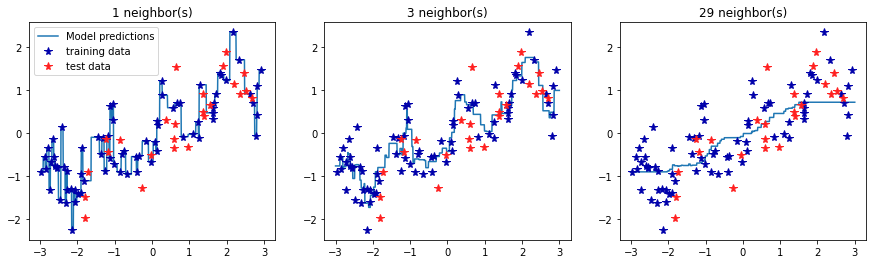

In [8]:

import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(1,3,figsize=(15,4))
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,29],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(x_train,y_train,'*',c=mglearn.cm2(0),markersize=8)
    ax.plot(x_test,y_test,'*',c=mglearn.cm2(1),markersize=8)
    ax.set_title(f"{n_neighbors} neighbor(s)")
axes[0].legend(["Model predictions","training data","test data"],loc="best")

w[0]: 0.393906  b: -0.031804


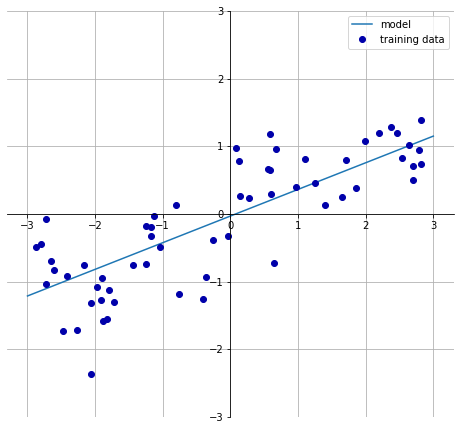

In [9]:
mglearn.plots.plot_linear_regression_wave()

In [10]:
from sklearn.linear_model import LinearRegression
a,b=mglearn.datasets.make_wave(n_samples=60)
a_train,a_test,b_train,b_test=train_test_split(a,b,random_state=0)
lr=LinearRegression().fit(a_train,b_train)

In [11]:
print(lr.coef_,lr.intercept_)

[0.44153666] -0.01711124414733381


In [12]:
print(lr.score(a_train,b_train))
print(lr.score(a_test,b_test))

0.6592061059587275
0.6932519118518163


In [13]:
a,b=mglearn.datasets.load_extended_boston()
a_train,a_test,b_train,b_test=train_test_split(a,b,random_state=0)
lr=LinearRegression().fit(a_train,b_train)
print(lr.score(a_train,b_train))
print(lr.score(a_test,b_test))

0.952051960903273
0.607472195966594


In [14]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(a_train,b_train)


In [15]:
print(ridge.score(a_train,b_train))

0.8857966585170941


In [16]:
print(ridge.score(a_test,b_test))

0.752768348174475


In [17]:
ridge10=Ridge(alpha=10).fit(a_train,b_train)
print(ridge10.score(a_train,b_train))
print(ridge10.score(a_test,b_test))

0.7882787115369614
0.6359411489177311


In [18]:
ridge01=Ridge(alpha=0.1).fit(a_train,b_train)
print(ridge01.score(a_train,b_train))
print(ridge01.score(a_test,b_test))

0.9282273685001985
0.7722067936479666


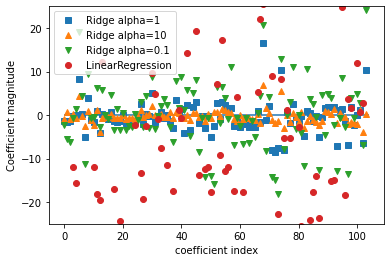

In [33]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')
plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()